# Rosenbrock function
Consider the n-dimensional Rosenbrock function:

\begin{eqnarray}
\sum_{i=1}^{n-1} 100 \cdot (x_{i+1} - x_{i}^2)^2 + (x_{i} - 1)^2 &
\end{eqnarray}

a. What is the i-th position of $\nabla f(x)$, for $1 \le i \le n$?

b. What is the ij-th position of $\nabla^2 f(x)$, for $1 \le i,j \le n$?

In [1]:
import numpy as np
import scipy.sparse as spa
import scipy.sparse.linalg as las
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import display, Latex
import sympy as sp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def fun_Rosenbrock(n):
  f = parse_expr('+'.join([f'100*(x{i+1}-x{i}**2)**2 + (x{i}-1)**2' for i in range(1,n)]));
  return f

def fun_Gradient(f,x):
  gf = sp.Matrix([sp.diff(f,var) for var in x]);
  return gf;

def fun_Hessian(g,x):
  Hf = sp.Matrix([list(fun_Gradient(fun,x)) for fun in g]);
  return Hf;

In [3]:
n = 5;
fx = fun_Rosenbrock(n);

xs = sp.Matrix([f'x{i}' for i in range(1,n+1)]);
gx = fun_Gradient(fx,xs);

Hx = fun_Hessian(gx,xs);

## Rosenbrock function

In [4]:
display(Latex('f({\\bf x}) = '+sp.latex(fx)));

<IPython.core.display.Latex object>

In [5]:
def rosenbrock(x,n):
  f = np.sum([100*(x[i+1]-x[i]**2)**2+(x[i]-1)**2 for i in range(0,n-1)]);
  return f

## Rosenbrock gradient

In [6]:
display(Latex('\\nabla^2 f({\\bf x}) = '+sp.latex(gx)));

<IPython.core.display.Latex object>

In [7]:
def gradient(x,n):
  g = np.zeros(n);
  g[1:] = -200*np.power(x[:-1],2)
  g[:-1] += -400*x[:-1] * (-np.power(x[:-1],2) + x[1:])
  g[1:-1] += 202*x[1:-1]
  g[0] += 2*x[0]
  g[-1] += 200*x[-1]
  g[:-1] += -2
  return g 

## Rosenbrock hessian

In [8]:
display(Latex('\\nabla f({\\bf x}) = '+sp.latex(Hx)));

<IPython.core.display.Latex object>

In [9]:
def hessian(x,n):
  ds = -400*x[:-1]
  dp = np.zeros(n);
  dp[:-1] = 1200*np.power(x[:-1],2) - 400*x[1:]
  dp[0] += 2
  dp[1:-1] += 202
  dp[-1] = 200 
  ind = np.arange(0,n);
  I = np.concatenate((ind,ind[:-1],ind[:-1]+1));
  J = np.concatenate((ind,ind[:-1]+1,ind[:-1]));
  V = np.concatenate((dp,ds,ds))
  H = spa.coo_matrix((V,(I,J)));
  return H

## Newton's method

In [10]:
n = 10**4;
xk = 5*np.ones(n);
norm_gradientK = [];
for k in range(0,50):
  Hk = hessian(xk,n);
  gk = gradient(xk,n);
  norm_gradientK.append(np.linalg.norm(gk));
  dxk = las.spsolve(Hk,-gk);
  xk = xk+dxk;

/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


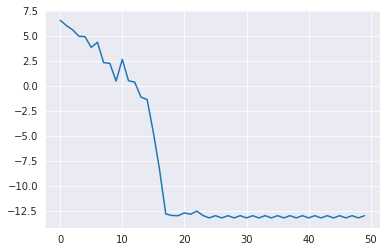

In [11]:
sns.set_style('darkgrid')
plt.plot(np.log10(norm_gradientK));

# Rotated Hyper-Ellipsoid function

Consider the n-dimensional rotated hyper-ellipsoid function:

\begin{eqnarray}
\sum_{i=1}^{n} \sum_{j=1}^{i} x^2_j 
\end{eqnarray}

a. What is the i-th position of $\nabla f(x)$, for $1 \le i \le n$?

b. What is the ij-th position of $\nabla^2 f(x)$, for $1 \le i,j \le n$?

In [12]:
import numpy as np
import scipy.sparse as spa
import scipy.sparse.linalg as las
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import display, Latex
import sympy as sp

In [13]:
def fun_RHE(n):
  f = parse_expr('+'.join('+'.join([f'x{j}**2' for j in range(1,i)]) for i in range(1,n)));
  return f

def fun_Gradient(f,x):
  gf = sp.Matrix([sp.diff(f,var) for var in x]);
  return gf;

def fun_Hessian(g,x):
  Hf = sp.Matrix([list(fun_Gradient(fun,x)) for fun in g]);
  return Hf;

In [14]:
n = 7;
fx = fun_RHE(n);

xs = sp.Matrix([f'x{i}' for i in range(0,n)]);
gx = fun_Gradient(fx,xs);

Hx = fun_Hessian(gx,xs);

## Rotated Hyper-Ellipsoid function



In [75]:
display(Latex('f({\\bf x}) = '+sp.latex(fx)));

<IPython.core.display.Latex object>

In [15]:
def RHE(n):
  rhe = np.sum([np.sum([x[j]**2 for j in range(0, i)]) for i in range(0, n)])
  return rhe

## RHE gradient

In [16]:
display(Latex('\\nabla f({\\bf x}) = '+sp.latex(gx)));

<IPython.core.display.Latex object>

In [ ]:
def gradient(x,n):
  return 0

## RHE hessian

In [17]:
display(Latex('\\nabla^2 f({\\bf x}) = '+sp.latex(Hx)));

<IPython.core.display.Latex object>

In [ ]:
def hessian(x,n):
  ind = np.arange(0,n);
  I = np.concatenate((ind,ind[:-1],ind[:-1]+1));
  J = np.concatenate((ind,ind[:-1]+1,ind[:-1]));
  V = np.concatenate((dp,ds,ds))
  H = spa.coo_matrix((V,(I,J)));
  return H

## Newton's method

In [ ]:
n = 10**4;
xk = 5*np.ones(n);
norm_gradientK = [];
for k in range(0,50):
  Hk = hessian(xk,n);
  gk = gradient(xk,n);
  norm_gradientK.append(np.linalg.norm(gk));
  dxk = las.spsolve(Hk,-gk);
  xk = xk+dxk;